# Brain Tumor Detection using Machine Learning #

In [162]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB as Naive_Bayes
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification
from sklearn.metrics import ConfusionMatrixDisplay
from xgboost import XGBClassifier

from IPython.display import display

In [163]:
import requests

In [164]:
import pandas as pd
url_string = 'https://raw.githubusercontent.com/Bishwaprotapi/Brain-Tumor-Using-ML-Model/main/brain_tumor_dataset.csv'
# Reading Data Into Pandas Dataframe
df = pd.read_csv(url_string)
df

,Patient_ID,Age,Gender,Tumor_Type,Tumor_Size,Location,Histology,Stage,Symptom_1,Symptom_2,Symptom_3,Radiation_Treatment,Surgery_Performed,Chemotherapy,Survival_Rate,Tumor_Growth_Rate,Family_History,MRI_Result,Follow_Up_Required
0,1,73,Male,Malignant,5.375612,Temporal,Astrocytoma,III,Vision Issues,Seizures,Seizures,No,No,No,51.312579,0.111876,No,Positive,Yes
1,2,26,Male,Benign,4.847098,Parietal,Glioblastoma,II,Headache,Headache,Nausea,Yes,Yes,Yes,46.373273,2.165736,Yes,Positive,Yes
2,3,31,Male,Benign,5.588391,Parietal,Meningioma,I,Vision Issues,Headache,Seizures,No,No,No,47.072221,1.884228,No,Negative,No
3,4,29,Male,Malignant,1.436600,Temporal,Medulloblastoma,IV,Vision Issues,Seizures,Headache,Yes,No,Yes,51.853634,1.283342,Yes,Negative,No
4,5,54,Female,Benign,2.417506,Parietal,Glioblastoma,I,Headache,Headache,Seizures,No,No,Yes,54.708987,2.069477,No,Positive,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,21,Male,Malignant,9.612013,Parietal,Medulloblastoma,III,Seizures,Nausea,Vision Issues,No,No,Yes,58.229662,0.353806,No,Negative,Yes
19996,19997,32,Female,Benign,1.543560,Temporal,Meningioma,III,Headache,Headache,Vision Issues,Yes,Yes,No,77.706856,2.341074,No,Positive,No
19997,19998,57,Female,Benign,3.618634,Temporal,Medulloblastoma,I,Seizures,Vision Issues,Nausea,No,No,Yes,89.543803,2.332881,No,Positive,Yes
19998,19999,68,Male,Malignant,8.519086,Parietal,Glioblastoma,III,Seizures,Headache,Vision Issues,Yes,Yes,Yes,83.306781,2.387202,No,Positive,No


# Data Preprocessing #
#### The following steps are performed on the dataset in this section: ####

- Dropping Redudant Columns
- Checking For Duplicated Rows
- Checking For Missing Values

In [165]:
df.head(10)

,Patient_ID,Age,Gender,Tumor_Type,Tumor_Size,Location,Histology,Stage,Symptom_1,Symptom_2,Symptom_3,Radiation_Treatment,Surgery_Performed,Chemotherapy,Survival_Rate,Tumor_Growth_Rate,Family_History,MRI_Result,Follow_Up_Required
0,1,73,Male,Malignant,5.375612,Temporal,Astrocytoma,III,Vision Issues,Seizures,Seizures,No,No,No,51.312579,0.111876,No,Positive,Yes
1,2,26,Male,Benign,4.847098,Parietal,Glioblastoma,II,Headache,Headache,Nausea,Yes,Yes,Yes,46.373273,2.165736,Yes,Positive,Yes
2,3,31,Male,Benign,5.588391,Parietal,Meningioma,I,Vision Issues,Headache,Seizures,No,No,No,47.072221,1.884228,No,Negative,No
3,4,29,Male,Malignant,1.436600,Temporal,Medulloblastoma,IV,Vision Issues,Seizures,Headache,Yes,No,Yes,51.853634,1.283342,Yes,Negative,No
4,5,54,Female,Benign,2.417506,Parietal,Glioblastoma,I,Headache,Headache,Seizures,No,No,Yes,54.708987,2.069477,No,Positive,Yes
5,6,27,Male,Malignant,3.483837,Frontal,Astrocytoma,I,Vision Issues,Vision Issues,Headache,Yes,Yes,No,83.572069,2.261380,No,Negative,Yes
6,7,72,Male,Malignant,8.026672,Occipital,Meningioma,IV,Vision Issues,Headache,Nausea,Yes,No,Yes,69.825016,2.965008,No,Negative,No
7,8,61,Male,Benign,6.319362,Occipital,Astrocytoma,I,Headache,Seizures,Nausea,Yes,Yes,No,62.775921,2.269111,No,Negative,No
8,9,50,Male,Benign,8.075229,Temporal,Medulloblastoma,IV,Vision Issues,Vision Issues,Nausea,No,Yes,Yes,44.913090,1.208336,No,Negative,Yes
9,10,54,Male,Benign,8.549382,Frontal,Meningioma,I,Seizures,Vision Issues,Vision Issues,Yes,No,No,85.087322,2.764735,Yes,Positive,Yes


In [166]:
df.tail(10)

,Patient_ID,Age,Gender,Tumor_Type,Tumor_Size,Location,Histology,Stage,Symptom_1,Symptom_2,Symptom_3,Radiation_Treatment,Surgery_Performed,Chemotherapy,Survival_Rate,Tumor_Growth_Rate,Family_History,MRI_Result,Follow_Up_Required
19990,19991,38,Male,Malignant,1.199344,Parietal,Meningioma,I,Seizures,Nausea,Seizures,Yes,No,No,89.173300,1.158673,No,Negative,Yes
19991,19992,66,Male,Malignant,1.838305,Occipital,Medulloblastoma,I,Vision Issues,Seizures,Vision Issues,No,No,No,80.060746,1.730296,No,Negative,Yes
19992,19993,28,Female,Benign,5.071801,Temporal,Medulloblastoma,IV,Seizures,Vision Issues,Nausea,No,No,Yes,66.275677,1.432750,No,Positive,Yes
19993,19994,77,Male,Malignant,8.598631,Temporal,Meningioma,III,Seizures,Headache,Vision Issues,Yes,No,No,52.367945,0.688433,Yes,Negative,Yes
19994,19995,62,Female,Benign,2.872689,Frontal,Meningioma,IV,Seizures,Nausea,Headache,Yes,No,No,87.574088,0.903568,No,Negative,Yes
19995,19996,21,Male,Malignant,9.612013,Parietal,Medulloblastoma,III,Seizures,Nausea,Vision Issues,No,No,Yes,58.229662,0.353806,No,Negative,Yes
19996,19997,32,Female,Benign,1.543560,Temporal,Meningioma,III,Headache,Headache,Vision Issues,Yes,Yes,No,77.706856,2.341074,No,Positive,No
19997,19998,57,Female,Benign,3.618634,Temporal,Medulloblastoma,I,Seizures,Vision Issues,Nausea,No,No,Yes,89.543803,2.332881,No,Positive,Yes
19998,19999,68,Male,Malignant,8.519086,Parietal,Glioblastoma,III,Seizures,Headache,Vision Issues,Yes,Yes,Yes,83.306781,2.387202,No,Positive,No
19999,20000,61,Male,Benign,9.716768,Temporal,Medulloblastoma,I,Vision Issues,Seizures,Nausea,No,No,No,47.433468,2.464077,Yes,Negative,Yes


In [167]:
print('Number of Features In Dataset :', df.shape[1])
print('Number of Instances In Dataset : ', df.shape[0])

Number of Features In Dataset : 19
Number of Instances In Dataset :  20000


In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Patient_ID           20000 non-null  int64  
 1   Age                  20000 non-null  int64  
 2   Gender               20000 non-null  object 
 3   Tumor_Type           20000 non-null  object 
 4   Tumor_Size           20000 non-null  float64
 5   Location             20000 non-null  object 
 6   Histology            20000 non-null  object 
 7   Stage                20000 non-null  object 
 8   Symptom_1            20000 non-null  object 
 9   Symptom_2            20000 non-null  object 
 10  Symptom_3            20000 non-null  object 
 11  Radiation_Treatment  20000 non-null  object 
 12  Surgery_Performed    20000 non-null  object 
 13  Chemotherapy         20000 non-null  object 
 14  Survival_Rate        20000 non-null  float64
 15  Tumor_Growth_Rate    20000 non-null 

In [169]:
df.dtypes

Patient_ID               int64
Age                      int64
Gender                  object
Tumor_Type              object
Tumor_Size             float64
Location                object
Histology               object
Stage                   object
Symptom_1               object
Symptom_2               object
Symptom_3               object
Radiation_Treatment     object
Surgery_Performed       object
Chemotherapy            object
Survival_Rate          float64
Tumor_Growth_Rate      float64
Family_History          object
MRI_Result              object
Follow_Up_Required      object
dtype: object

In [170]:
df.isnull().sum()

Patient_ID             0
Age                    0
Gender                 0
Tumor_Type             0
Tumor_Size             0
Location               0
Histology              0
Stage                  0
Symptom_1              0
Symptom_2              0
Symptom_3              0
Radiation_Treatment    0
Surgery_Performed      0
Chemotherapy           0
Survival_Rate          0
Tumor_Growth_Rate      0
Family_History         0
MRI_Result             0
Follow_Up_Required     0
dtype: int64

In [171]:
df.duplicated().sum()

np.int64(0)

In [172]:
df.columns

Index(['Patient_ID', 'Age', 'Gender', 'Tumor_Type', 'Tumor_Size', 'Location',
       'Histology', 'Stage', 'Symptom_1', 'Symptom_2', 'Symptom_3',
       'Radiation_Treatment', 'Surgery_Performed', 'Chemotherapy',
       'Survival_Rate', 'Tumor_Growth_Rate', 'Family_History', 'MRI_Result',
       'Follow_Up_Required'],
      dtype='object')

### Data visualizations ###

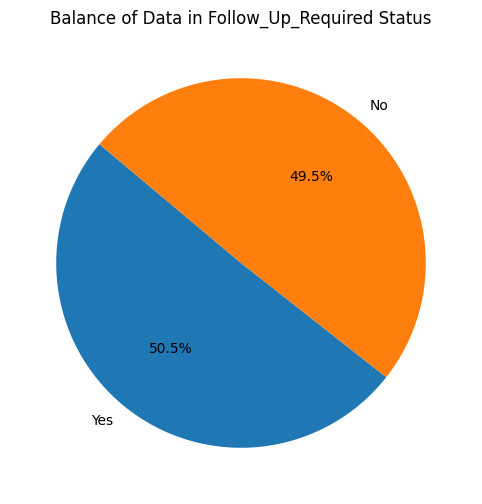

In [173]:
# Calculate the balance of data in 'Follow_Up_Required' status for this project with more detail on a pie chart
follow_up_counts = df['Follow_Up_Required'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(follow_up_counts, labels=follow_up_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Balance of Data in Follow_Up_Required Status')
plt.show()


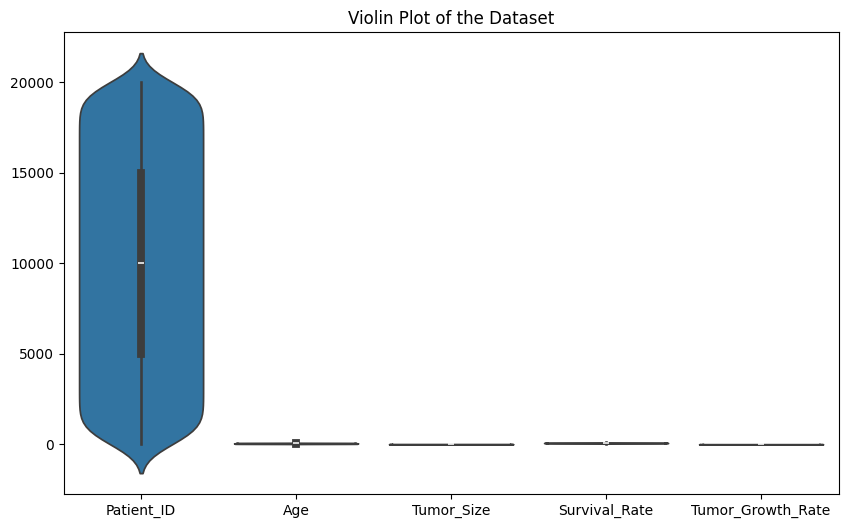

In [174]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df)
plt.title('Violin Plot of the Dataset')
plt.show()



<Figure size 1500x400 with 0 Axes>

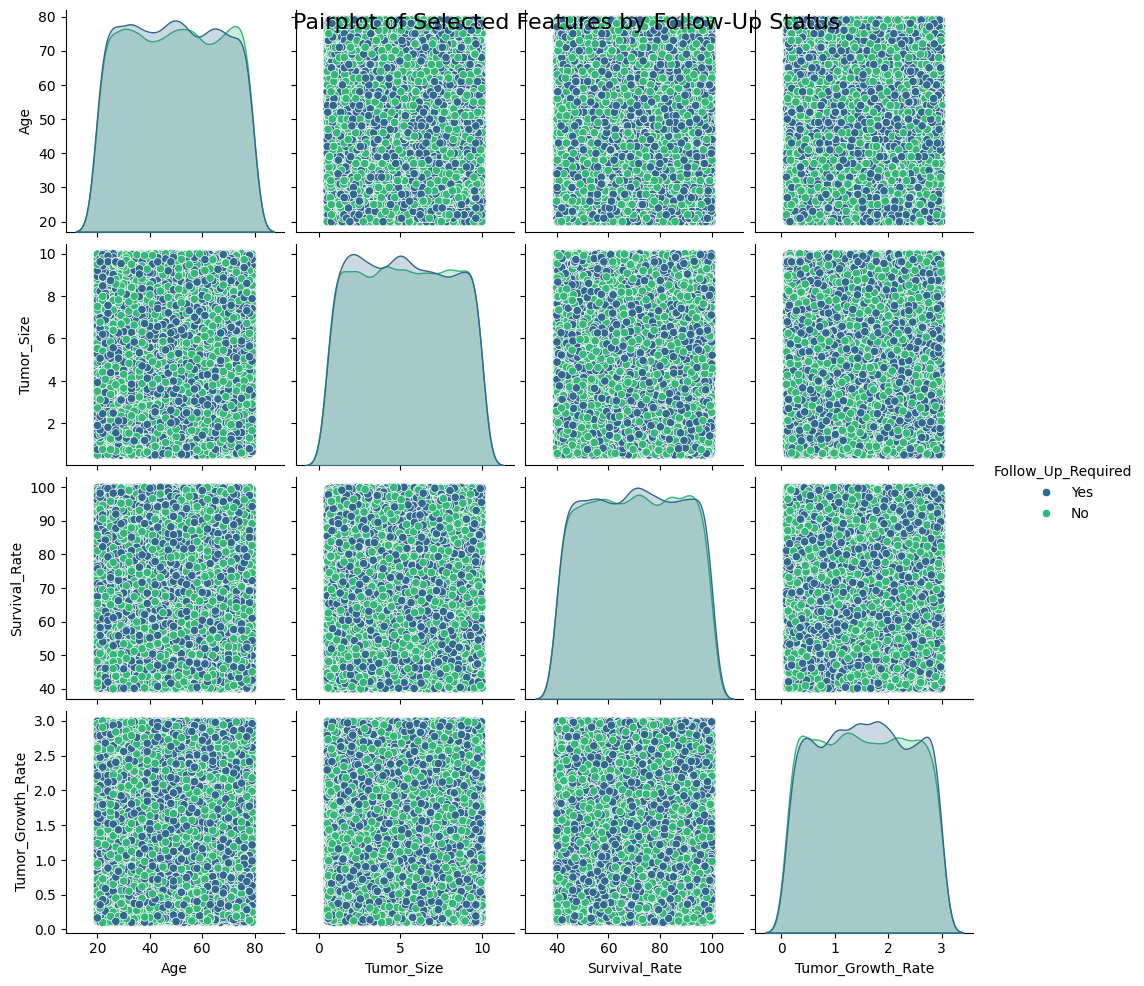

In [175]:
plt.figure(figsize=(15, 4))
sns.pairplot(df, hue='Follow_Up_Required', vars=['Age', 'Tumor_Size', 'Survival_Rate', 'Tumor_Growth_Rate'], palette="viridis")
plt.suptitle('Pairplot of Selected Features by Follow-Up Status', fontsize=16)
plt.show()



C:\Users\USER\AppData\Local\Temp\ipykernel_22036\125644444.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=[stage_names[stage] for stage in stage_counts.index], y=stage_counts.values, palette="viridis")


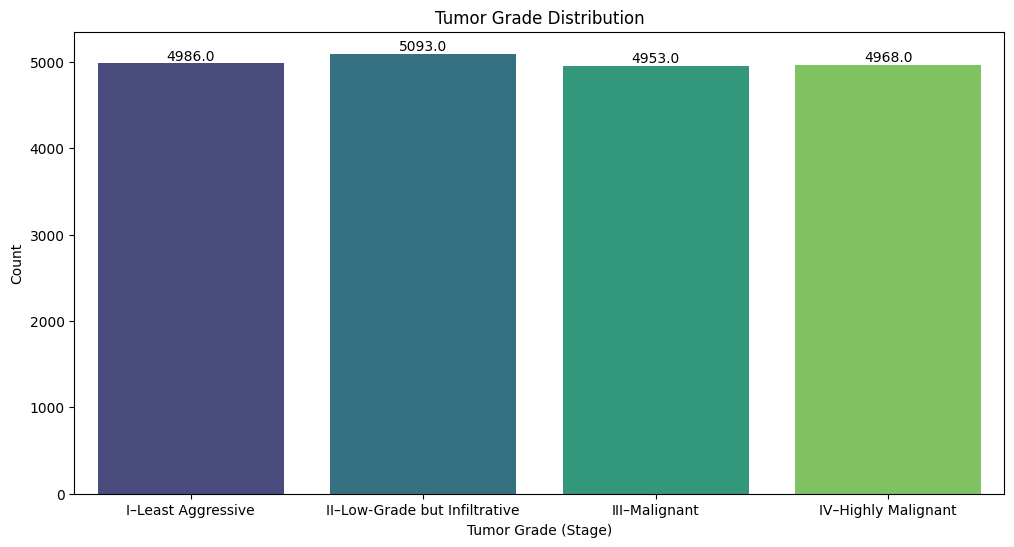

In [176]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of cases for each tumor grade (Stage)
stage_counts = df['Stage'].value_counts().sort_index()  # sort_index() ensures I, II, III, IV order

# Map stage names
stage_names = {
    'I': 'I–Least Aggressive',
    'II': 'II–Low-Grade but Infiltrative',
    'III': 'III–Malignant',
    'IV': 'IV–Highly Malignant'
}

plt.figure(figsize=(12,6))
bars = sns.barplot(x=[stage_names[stage] for stage in stage_counts.index], y=stage_counts.values, palette="viridis")
plt.title('Tumor Grade Distribution')
plt.xlabel('Tumor Grade (Stage)')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Annotate each bar with its count value
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), bar.get_height(), ha='center', va='bottom')

plt.show()

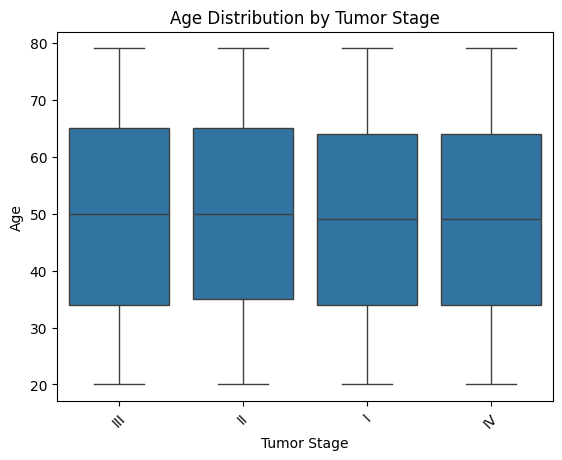

In [177]:
sns.boxplot(x='Stage', y='Age', data=df)
plt.title('Age Distribution by Tumor Stage')
plt.xlabel('Tumor Stage')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.show()

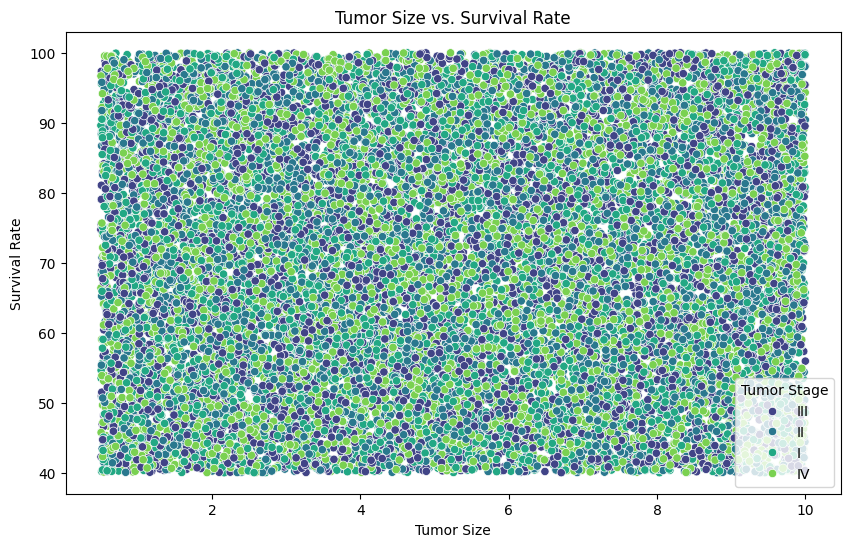

In [178]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Tumor_Size', y='Survival_Rate', data=df, hue='Stage', palette="viridis")
plt.title('Tumor Size vs. Survival Rate')
plt.xlabel('Tumor Size')
plt.ylabel('Survival Rate')
plt.legend(title="Tumor Stage")
plt.show()



C:\Users\USER\AppData\Local\Temp\ipykernel_22036\3627700911.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mri_result_counts.index, y=mri_result_counts.values, palette="viridis")


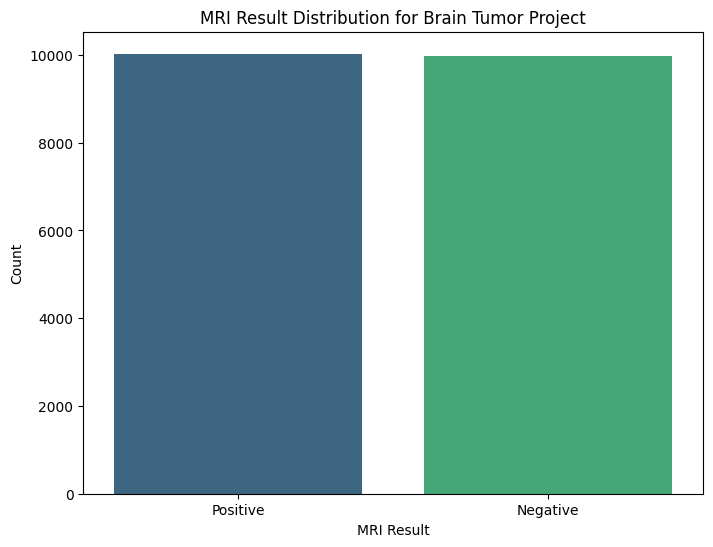

In [179]:
mri_result_counts = df['MRI_Result'].value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=mri_result_counts.index, y=mri_result_counts.values, palette="viridis")
plt.title('MRI Result Distribution for Brain Tumor Project')
plt.xlabel('MRI Result')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()



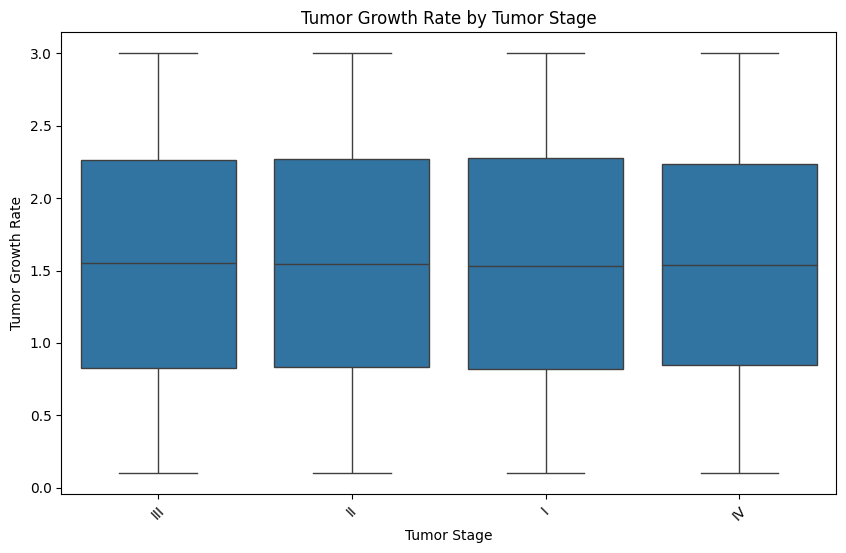

In [180]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Stage', y='Tumor_Growth_Rate', data=df)
plt.title('Tumor Growth Rate by Tumor Stage')
plt.xlabel('Tumor Stage')
plt.ylabel('Tumor Growth Rate')
plt.xticks(rotation=45)
plt.show()


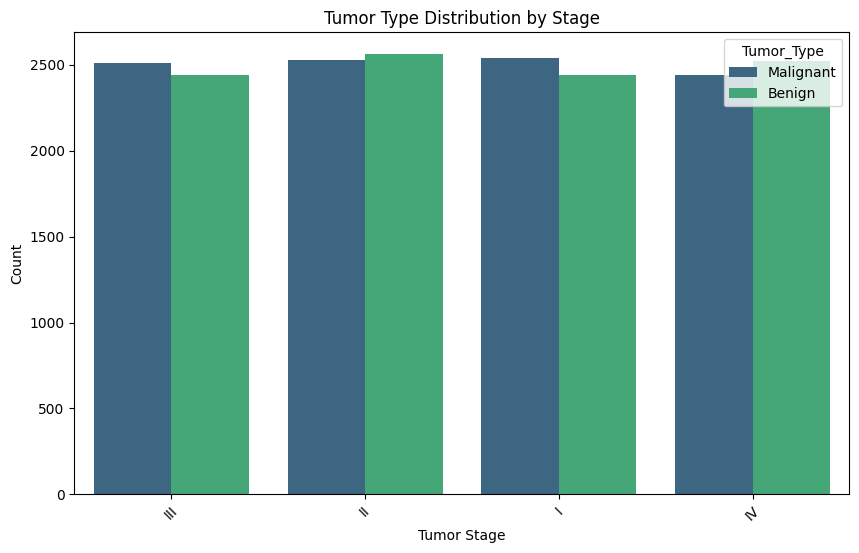

In [181]:
plt.figure(figsize=(10,6))
sns.countplot(x='Stage', hue='Tumor_Type', data=df, palette="viridis")
plt.title('Tumor Type Distribution by Stage')
plt.xlabel('Tumor Stage')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()



C:\Users\USER\AppData\Local\Temp\ipykernel_22036\1661346447.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tumor_location_counts.index, y=tumor_location_counts.values, palette="viridis")


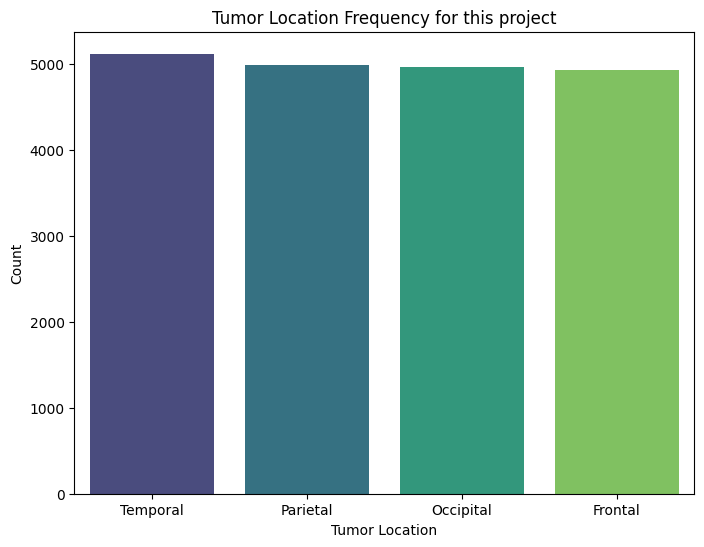

In [182]:
tumor_location_counts = df['Location'].value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=tumor_location_counts.index, y=tumor_location_counts.values, palette="viridis")
plt.title('Tumor Location Frequency for this project')
plt.xlabel('Tumor Location')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()



C:\Users\USER\AppData\Local\Temp\ipykernel_22036\445560422.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=histology_counts.index, y=histology_counts.values, palette="viridis")


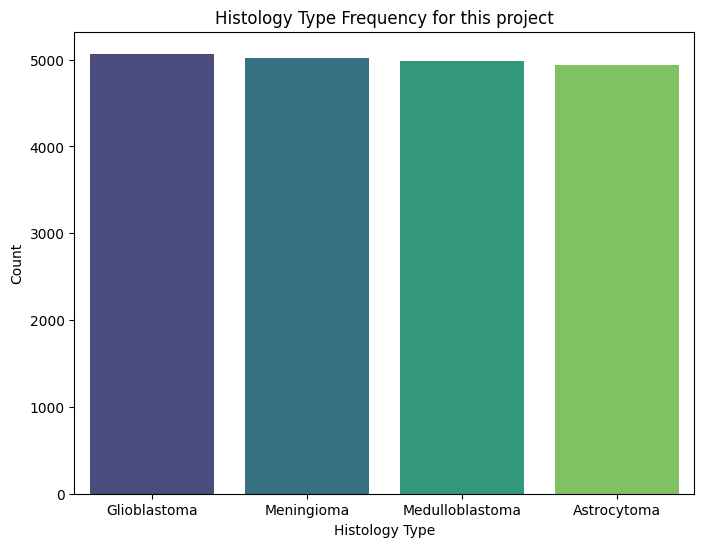

In [183]:
histology_counts = df['Histology'].value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=histology_counts.index, y=histology_counts.values, palette="viridis")
plt.title('Histology Type Frequency for this project')
plt.xlabel('Histology Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()



C:\Users\USER\AppData\Local\Temp\ipykernel_22036\1741895434.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: pd.to_numeric(x, errors='ignore') if not isinstance(x, str) else x)
C:\Users\USER\AppData\Local\Temp\ipykernel_22036\1741895434.py:4: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.applymap(lambda x: pd.to_numeric(x, errors='ignore') if not isinstance(x, str) else x)


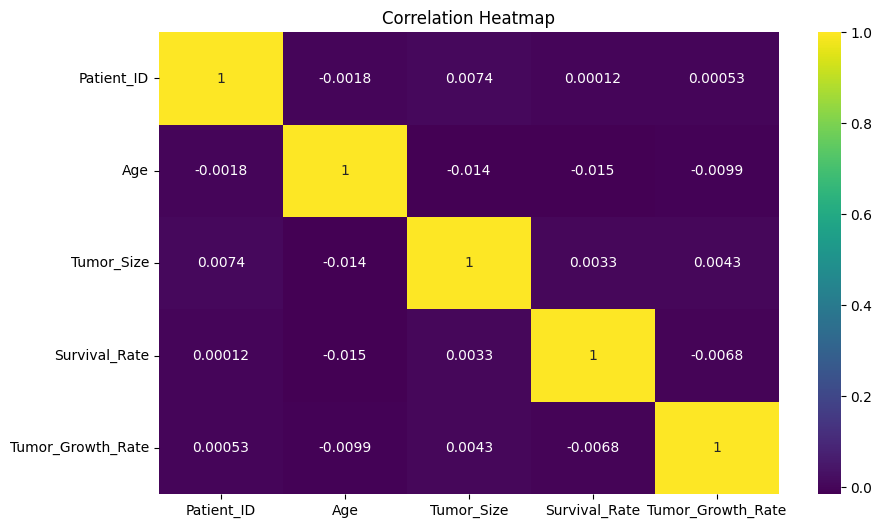

In [184]:
import seaborn as sns

# Convert non-numeric columns to numeric before calculating correlation
df = df.applymap(lambda x: pd.to_numeric(x, errors='ignore') if not isinstance(x, str) else x)

plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=['int64', 'float64']).corr(), annot=True, cmap='viridis')
plt.title('Correlation Heatmap')
plt.show()


### Balancing Dataset ###

In [185]:
# Exploring Imbalance In Dataset
print("Class labels distribution:")
print(df['Tumor_Type'].value_counts())

Class labels distribution:
Tumor_Type
Malignant    10030
Benign        9970
Name: count, dtype: int64


In [186]:
# Extracting Features Into Features & Target
X_features = df.drop(['Tumor_Type', 'Patient_ID'], axis=1)  # Drop Patient_ID as well
Y_labels = df['Tumor_Type']
Y_labels

0        Malignant
1           Benign
2           Benign
3        Malignant
4           Benign
           ...    
19995    Malignant
19996       Benign
19997       Benign
19998    Malignant
19999       Benign
Name: Tumor_Type, Length: 20000, dtype: object

In [187]:
# Convert categorical features to numeric
X_features = pd.get_dummies(X_features)
X_features

,Age,Tumor_Size,Survival_Rate,Tumor_Growth_Rate,Gender_Female,Gender_Male,Location_Frontal,Location_Occipital,Location_Parietal,Location_Temporal,...,Surgery_Performed_No,Surgery_Performed_Yes,Chemotherapy_No,Chemotherapy_Yes,Family_History_No,Family_History_Yes,MRI_Result_Negative,MRI_Result_Positive,Follow_Up_Required_No,Follow_Up_Required_Yes
0,73,5.375612,51.312579,0.111876,False,True,False,False,False,True,...,True,False,True,False,True,False,False,True,False,True
1,26,4.847098,46.373273,2.165736,False,True,False,False,True,False,...,False,True,False,True,False,True,False,True,False,True
2,31,5.588391,47.072221,1.884228,False,True,False,False,True,False,...,True,False,True,False,True,False,True,False,True,False
3,29,1.436600,51.853634,1.283342,False,True,False,False,False,True,...,True,False,False,True,False,True,True,False,True,False
4,54,2.417506,54.708987,2.069477,True,False,False,False,True,False,...,True,False,False,True,True,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,21,9.612013,58.229662,0.353806,False,True,False,False,True,False,...,True,False,False,True,True,False,True,False,False,True
19996,32,1.543560,77.706856,2.341074,True,False,False,False,False,True,...,False,True,True,False,True,False,False,True,True,False
19997,57,3.618634,89.543803,2.332881,True,False,False,False,False,True,...,True,False,False,True,True,False,False,True,False,True
19998,68,8.519086,83.306781,2.387202,False,True,False,False,True,False,...,False,True,False,True,True,False,False,True,True,False


In [188]:
# Intialising SMOTE Object
from sklearn.utils import resample
smote = resample(random_state=42)

In [189]:
# Resampling Data
from sklearn.utils import resample
X_resampled, Y_resampled = resample(X_features, Y_labels, random_state=42)

In [190]:
# Scaling features between -1 and 1 for normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))
X_resampled = scaler.fit_transform(X_resampled)
X_resampled

array([[-0.11864407,  0.85063884, -0.10780365, ...,  1.        ,
         1.        , -1.        ],
       [-0.38983051, -0.89127662,  0.92756439, ..., -1.        ,
         1.        , -1.        ],
       [-0.3559322 , -0.15908131,  0.46059014, ..., -1.        ,
        -1.        ,  1.        ],
       ...,
       [-0.38983051,  0.81834271, -0.02675862, ..., -1.        ,
        -1.        ,  1.        ],
       [-0.01694915, -0.33078499, -0.26032917, ...,  1.        ,
        -1.        ,  1.        ],
       [ 0.59322034, -0.8020477 , -0.77851912, ..., -1.        ,
        -1.        ,  1.        ]], shape=(20000, 42))

In [191]:
# define X_features , Y_labels
X_features = X_resampled
Y_labels = Y_resampled
Y_labels

15795    Malignant
860         Benign
5390     Malignant
11964       Benign
11284    Malignant
           ...    
10108    Malignant
19913    Malignant
18302       Benign
5761     Malignant
688         Benign
Name: Tumor_Type, Length: 20000, dtype: object

In [192]:
# Splitting the dataset into training and testing sets into 80 - 20
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_features, Y_labels, test_size=0.2, random_state=42, stratify=Y_labels)

## Machine Learning Model Training ##
#### In this section, we have trained and evaluated the following Machine Learning Models to predict Parkinson's disease diagnosis: ####

- Decision Tree Classifier: This model is simple to implement and interpret, but can be prone to overfitting.
- Random Forest Classifier: This ensemble model combines multiple decision trees to improve accuracy and reduce overfitting.
- Logistic Regression: This linear model is suitable for binary classification problems and provides interpretable coefficients.
- SVM (Support Vector Machine): This model is effective in high-dimensional spaces and can handle non-linear relationships.
- Naive Bayes: This family of probabilistic models is simple to implement and can handle categorical features.
- KNN Classifier: This model is based on the idea that similar instances should have similar labels.
- XGBoost Classifier: This gradient boosting model is known for its high accuracy and speed in handling large datasets.

Each model was trained and evaluated using the same dataset to ensure a fair comparison of their performance.

### Decision Tree ###

### Random Forest ###

### Logistic Regression ###

### SVM (Support Vector Machine) ###

### Naive Bayes ###

### K-Nearest Neighbors (KNN) ###

### XGBoost ###